This `Jupyter` notebook is based on the introduction book to `Neural Networks and Deep Learning` by Michael Nielsen.

Here you can find the online book, freely available: <a>http://neuralnetworksanddeeplearning.com/index.html</a>

# Chapter 1. Using neural nets to recognize handwritten digits.

## Perceptrons

A perceptron takes several binary inputs, $x_{1}, x_{2}, ...,$ and produces a single binary output ($0$ or $1$):

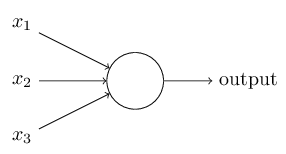

In order to compute the outputs we will use the *weights*, $w_{1}, w_{2}, ...,$ real numbers that express the importance of the respective input to the output.

The neuron's output, 0 or 1, is determined by whether the weighted sum: $\sum_j w_j x_j$ is less than or greater than some threshold value.

Just like the *weigths*, the threshold is a real number which will be a parameter of the neuron.

$\text{output} =
\begin{cases}
0 & \text{if } \sum_j w_j x_j \leq \text{threshold} \\
1 & \text{if } \sum_j w_j x_j > \text{threshold}
\end{cases}$

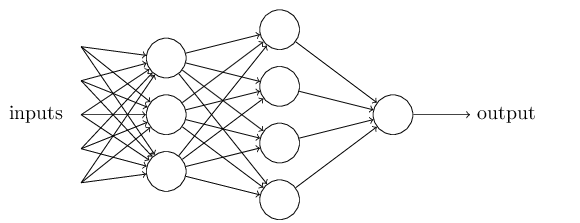

Watching the image above, we could assume that each of the perceptrons in the second layer is making a decision by weighing up the results from the first layer of decision-making.

In this way a perceptron in the second layer can make a decision at a more complex and more abstract leven than in the first layer. And even more complex decisions can be made by the perceptron in the third layer. In this way, a many-layer network of perceptrons can engage in sophisticated decision making.

The condition $\sum_j w_j x_j > threshold$ is a bit complicated and inefficient, so lets simplify it:

1. Let's write the formula as a dot product, $w \cdot x \equiv \sum_j w_j x_j$, where $w$ and $x$ are vectors whose components are the weigths and inputs, respectively.

2. Move the threshold to the other side of the inequality, and replace it by what's known as the perceptron's **bias**, $b \equiv -threshold$.

The perceptron rule can be rewritten as:

$\text{output} =
\begin{cases}
0 & \text{if } w \cdot x + b \leq 0 \\
1 & \text{if } w \cdot x + b > 0
\end{cases}$

We can think of the **bias** as a measure of how easy is to get the perceptron to output a $1$.

We have described perceptrons as a method for weighing evidence to make decisions. Another way perceptrons can be used is to compute **logical functions**, such as AND, OR, and NAND.

For example, suppose we have a perceptron with two inputs, each with weight $-2$, and an overall bias of 3:

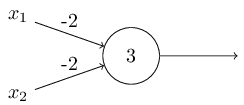

Then we can see that input $00$ produces output $1$, since:

$(-2) * 0 + (-2) * 0 + 3 = 3$, is positive.

The inputs 01 and 10 also produces an output of 1. But the input 11 produces output 0, since:

$(-2) * 1 + (-2) * 1 + 3 = -1$, is negative.

So, this way, out perceptron implements a **NAND** gate.



Up to now, we have been drawing inputs like $x_1$ and $x_2$ as variables floating to the left of the network of perceptrons. In fact, it's conventional to draw an extra layer of perceptrons carrying the input. This layer is called *input layer*.

This notation is for input perceptrons, in which we have an output, but no inputs:

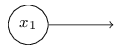

It's better to think of the input perceptrons as not really being perceptrons at all, but rather special units which are simply defined to output the desired values, as $x_1, x_2, ...$

It turns out that we can devise *learning algorithms* which can automatically tune the weights and biases of a network of artificial neurons. This tuning happens in response to an external stimulus, without direct intervention by a programmer.

These learning algorithms enable us to use artificial neurons in a way that is radically different to **conventional logic gates**.

## Sigmoid Neurons

**How can we devise sucg algorithms for a neural network?**

Suppose we have a network of perceptrons that we'd like to use to learn to solve some problem.

For example, the inputs to the network might be raw pixel data from a scanned, handwritten image of a digit. And we'd like the network to learn weights and biases so that the output from the network correctly classifies the digit.

To see how learning might work, suppose we make a small change in some weight (or bias) in the network. What we'd like is for this small change in weight to cause only a small corresponding change in the output form the network.

Schematically, this is what we would want:

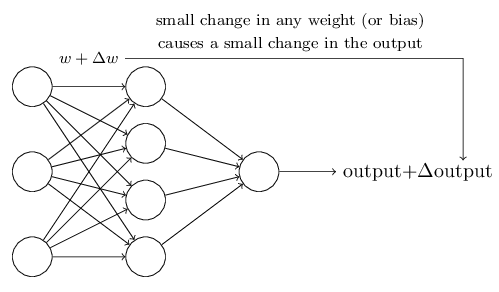

If making a small change in a weight (or bias) causes only a small change in output, then we could use this fact to modify the weights and biases to get our network to behave more in the manner that we want. For example, suppose that the network has mistakenly classified an image as an $8$ when it should be a $9$. We could figure out how to make a small change in the weights and biases so the network gets a little closer to classifying the image as a $9$. We would repeat this proces over and over to produce better and better output. The network would be learning.

The problem is that using tradicional perceptrons, a small change in the weights or bias of any single perceptron in the network can sometimes change the output of that perceptron to completely flip, say from 0 to 1.

We can overcome this problem by introducing a new type of artificial neuron called a *sigmoid neuron*. Sigmoid neurons are similar to perceptrons, but modified so that small change in their weights and bias cause only a small change in their output. That's a crucial fact which will allow a network of sigmoid neurons to learn.

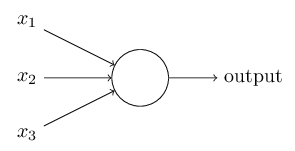

Just like a perceptron, the sigmoid neuron has inputs, $x_1, x_2,...$.

Instead of being just inputs of $0$ or $1$, these inputs can also take on any values between $0$ and $1$. So, for instance, $0.638...$ is a valid input for a sigmoid neuron.

Also just like a perceptron, the sigmoid neuron has weights for each input, $w_1, w_2, ...$, and an overall bias, b. But the output is not $0$ or $1$. Instead it's $\sigma(w \cdot x + b)$, where $\sigma$ is called the sigmoid function*, and is defined by:

$\sigma(z) \equiv \frac{1}{1 + e^{-z}}$

**Incidentally, $\sigma$ is sometimes called the logistic function, and this new class of neurons called logistic neurons. It's useful to remember this terminology, since these terms are used by many people working with neural nets. However, we'll stick with the sigmoid terminology.*


To put a little more explicitly, the output of a sigmoid neuron with inputs $x_1, x_2,...$, weights $w_1, w_2, ...$, and bias $b$ is:

$\frac{1}{1 + \exp\left(- \sum_j w_j x_j - b\right)}$

To understand the similarity to the perceptron model, suppose $z = w \cdot x + b$ is a large positive number. Then $e^{-z} \approx 0$  and so $\sigma (z) \approx 1$. In other words, when $z = w \cdot x + b$ is large and positive, the output from the sigmoid neuron is approximately 1, just as it would have been for a perceptron.

Suppose on the other hand that $z = w \cdot x + b$ is very negative. Then $e^{-z} \rightarrow \infty$, and $\sigma(z) \approx 0$. So when $z = w \cdot x + b$ is very negative, the behaviour of a sigmoid neuron also closely approximates a perceptron. It's only when $w \cdot x + b$ is of modest size that there's much deviation from the perceptron model.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


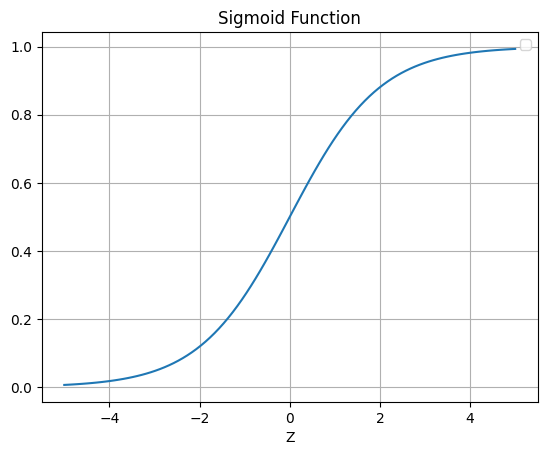

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos para la gráfica
x = np.linspace(-5, 5, 100)
y = 1 / (1 + np.exp(-x))

# Graficar la función sigmoide
plt.plot(x, y)
plt.xlabel('Z')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

This shape is a smoothed out version of a step function:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


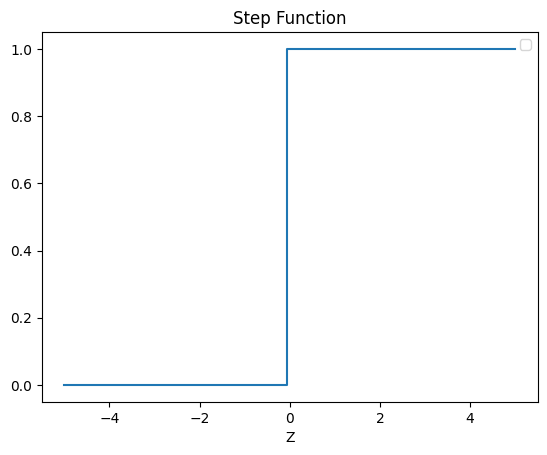

In [2]:
# Crear datos para la gráfica
x = np.linspace(-5, 5, 100)
y = np.where(x > 0, 1, 0)

# Graficar la función sigmoide
plt.step(x, y)
plt.xlabel('Z')
plt.title('Step Function')
plt.legend()
plt.show()

If $\sigma$ had in fact been a step function, then the sigmoid neuron would be a perceptron, since the output would be $1$ or $0$ depending on whether $w \cdot x + b$ was positive or negative.

By using the actual $\sigma$ function we get, as already implied above, a smoothed out perceptron. Indeed, it's the smoothness of the $\sigma$ function that is the crucial fact, not detailed form.

The smoothness of $\sigma$ means that small changes $\Delta w_j$ in the weights and $\Delta b$ in the bias will produce a small change $\Delta output$ in the output from the neutron. In fact, calculus tells us that $\Delta output$ is well approximated by:


> The symbol $\Delta \equiv$ Change or Difference  
> The symbol $\partial \equiv$ Partial Derivative

$$
\Delta \text{output} \approx \sum_j \frac{\partial \text{output}}{\partial w_j} \Delta w_j + \frac{\partial \text{output}}{\partial b} \Delta b
$$

Where the sum is over all the weights, $w_j$, and $\frac{\partial output}{\partial w_j}$ and $\frac{\partial output}{\partial b}$ denote partial derivatives of the output with respect to $w_j$ and $b$, respectively.

**Don't panic with the partial derivatives!** While the expression looks complicated, it's actually saying something very simple:

$\Delta output$ is a *linear function* of the changes $\Delta w_j$ and $\Delta b$ in the weights and bias.

So while sigmoid neurons have much of the same behaviour as the perceptrons, they make it much easier to figure out how changing the weights and biases will change the output.

Like we said before, it's the shape of $\sigma$ which really matters, so why do we use a particular form used in the ecuation before?

In fact, later we will occasionally consider neurons where the output is $f(w \cdot x + b)$ and for other *activation function* $f(\cdot)$.

The main thing that changes when we use a different activation function is that the particular values for the partial derivatives in Equation change. 

In any case, $\sigma$ is commonly-used in work on neural nets, and is the activation function we'll use most often.

SIgmoid neurons can be very handy if we want to use the output value to represent the average intensity of the pixels in an image input to a neural network.

## Architecture of Neural Networks

In the next section we will introduce a neural network that can do a pretty good job classifying handwritten digits. In preparation for that, it helps to explain some terminology. Suppose we have the network:

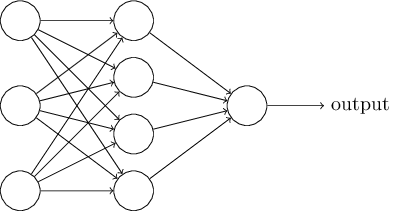

The leftmost layer in this network is called the input layer, and the neurons within the layer are called *input neurons*. The rightmost or output layer contains the output neurons, or in this case, a single output neuron. The middle layer is called a *hidden layer*, since the neurons in this layer are neither inputs nor outputs. It really only means nothing more than "not an input or an output". For example:

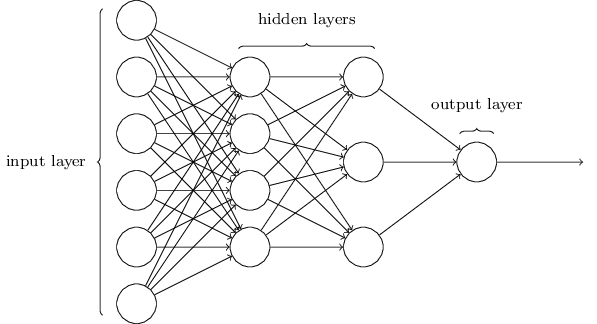

For historical reasons, such multiple layer networks are sometimes called *multilayer perceptrons* or *MLPs*, despite being made up of sigmoid neurons, not perceptrons.

The design of the input and output layers in a network is often straightforward. For example, if we're trying to determine whether a handwritten image is a "9" or not. A natural way to design the network is to encode the intensities of the image pixels into the input neurons. If the image is a $64$ by $64$ greyscale image, then we'd have $4096 = 64 x 64$ input neurons, with the intensities scaled appropriately between 0 and 1. The output layer will contain just a single neuron, with output values of less than $0.5$ indicating "input image is not a 9" and values greater than $0.5$ indicating "input image is a 9".

While the design of the input and output layers of a neural network is often straightforward, there can be quite an art to the design of the hidden layers. 

Neural networks researchers have developed many design heuristics for the hidden layers, which help people get the behaviour they want out of their nets. For example, such heuristics can be used to help determine **how to trade off the number of hidden layers against the time required to train the network**.

Up to now, we've been discussing neural networks where the output from one layer is used as input to the next layer. Such networks are called *feedforward* neural networks. This means there are no loops in the network, we'd end up with situations where the input to the $\sigma$ function depended on the output. This would be hard to make sense of, and so we don't allow such loops.

However, there are other models of artificial neural networks in which feedback loops are possible. These models are called **recurrent neural networks**. Neurons in these models fire for a short time before becoming inactive. This firing can trigger other neurons to fire shortly after, creating a cascade effect. Loops are not an issue because a neuron's output affects its input after a delay, not immediately.

Recurrent neural nets have been less influential than feedforward networks, in part because the learning algorithms for recurrent nets are less powerful. 

But *recurrent networks* are still extremely interesting. They're much closer in spirit to how our brains work than feedforward networks.

## A simple network to classify handwritten digits

HAving defined neural networks, let's return to handwritting recognition. We can split the problem of recognizing handwritten digits into two sub-problems. First, we'd like a way of breaking an image containing many digits into a sequence of separate images, each containing a single digit. For example, we'd like to break the image

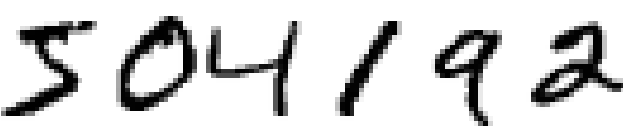

into six separate images,

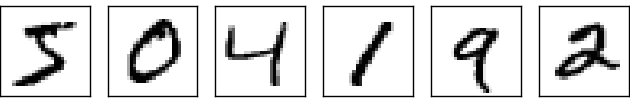